In [4]:
import pandas as pd
import pandas_profiling
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt

In [14]:
reddit_comments = pd.read_csv('../../data/reddit/reddit_comments_cleaned.csv')
reddit_posts = pd.read_csv('../../data/reddit/reddit_posts.csv')

In [5]:
reddit_comments.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
reddit_posts.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

reddit_comments['polarity'] = reddit_comments['comment'].apply(pol)
reddit_comments['subjectivity'] = reddit_comments['comment'].apply(sub)

In [18]:
reddit_comments.profile_report()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

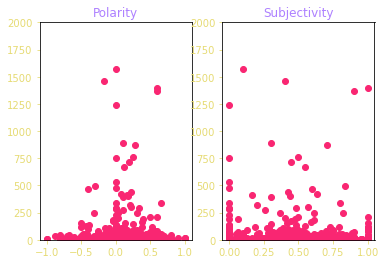

In [38]:
fig, axs = plt.subplots(1,2)
axs[0].set_ylim([0,2000])
axs[0].set_title('Polarity', color = '#AE81FF')
axs[0].tick_params(axis='x', colors='#E6DB74')
axs[0].tick_params(axis='y', colors='#E6DB74')
axs[1].set_ylim([0,2000])
axs[1].tick_params(axis='x', colors='#E6DB74')
axs[1].tick_params(axis='y', colors='#E6DB74')
axs[1].set_title('Subjectivity', color = '#AE81FF')
axs[0].plot(reddit_comments['polarity'],reddit_comments['ups'], 'o', color = '#F92672')
axs[1].plot(reddit_comments['subjectivity'],reddit_comments['ups'], 'o', color = '#F92672')

In [68]:
reddit_comments_subreddit = reddit_comments.join(reddit_posts[['post_id', 'subreddit']].set_index('post_id'), on='post_id')
subreddits = reddit_comments_subreddit['subreddit'].unique()
subreddits

array(['vaxxhappened', 'Conservative', 'COVID19', 'CovidVaccinated',
       'nashville', 'FloridaCoronavirus', 'CoronavirusMa', 'news',
       'CoronavirusMichigan', 'nyc', 'CovidVaccine', 'conspiracy',
       'VaccineMyths', 'antivax', 'Coronavirus', 'science', 'illinois',
       'pregnant', 'Indiana', 'CoronavirusWA'], dtype=object)

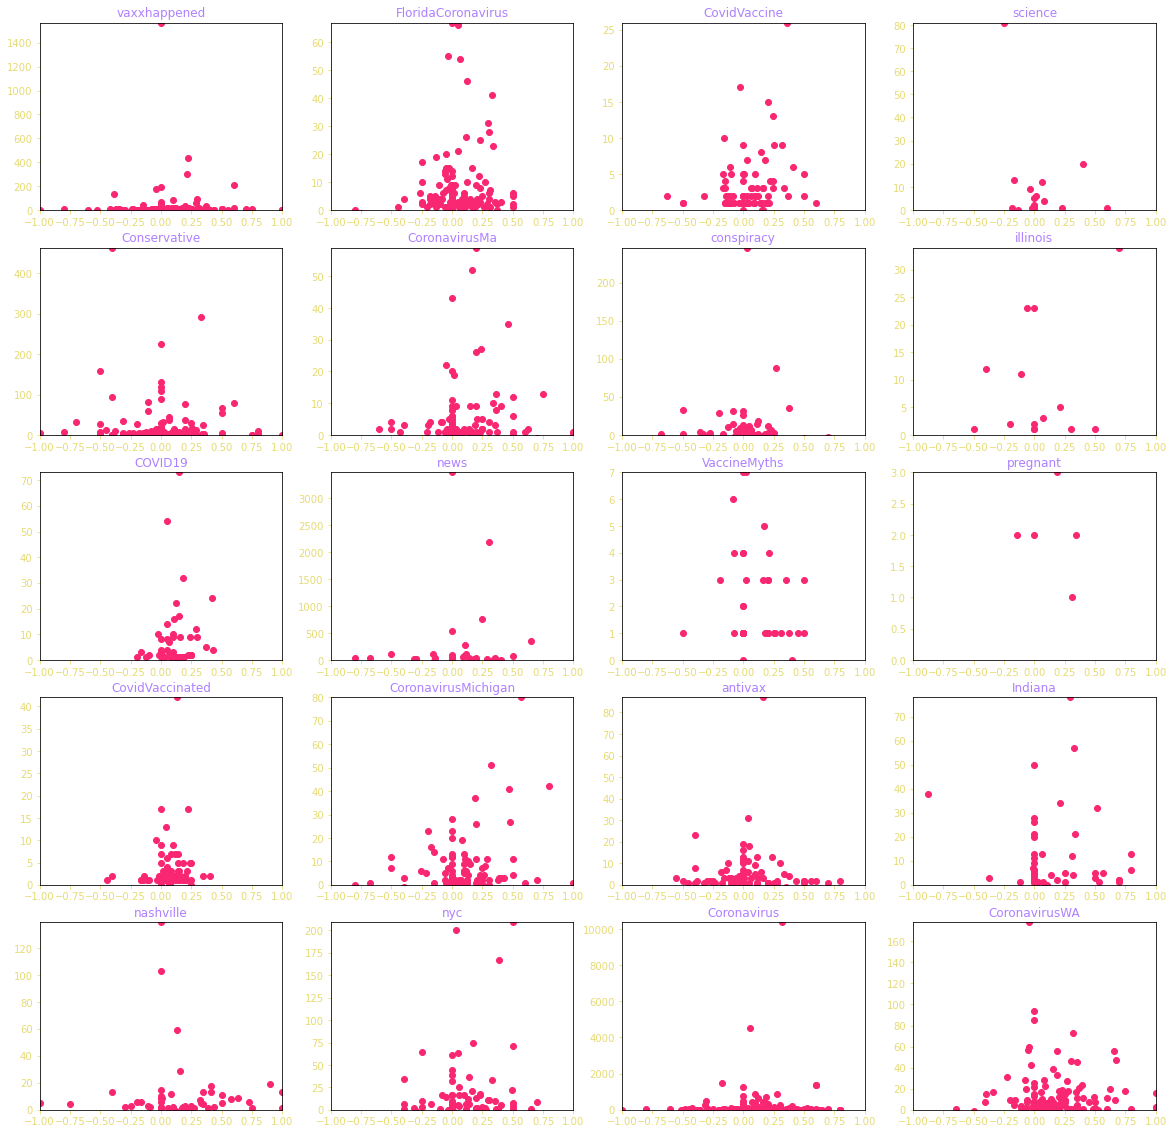

In [71]:
fig, axs = plt.subplots(5,4)
fig.set_size_inches(20,20)
for i in range(4):
    for j in range(5):
        x = reddit_comments_subreddit[reddit_comments_subreddit['subreddit']==subreddits[(i*5+j)]]['polarity']
        y = reddit_comments_subreddit[reddit_comments_subreddit['subreddit']==subreddits[(i*5+j)]]['ups']
        axs[j,i].set_ylim([0,y.max()])
        axs[j,i].set_xlim([-1,1])
        axs[j,i].set_title(subreddits[(i*5+j)], color = '#AE81FF')
        axs[j,i].tick_params(axis='x', colors='#E6DB74')
        axs[j,i].tick_params(axis='y', colors='#E6DB74')
        axs[j,i].plot(x, y, 'o', color = '#F92672')

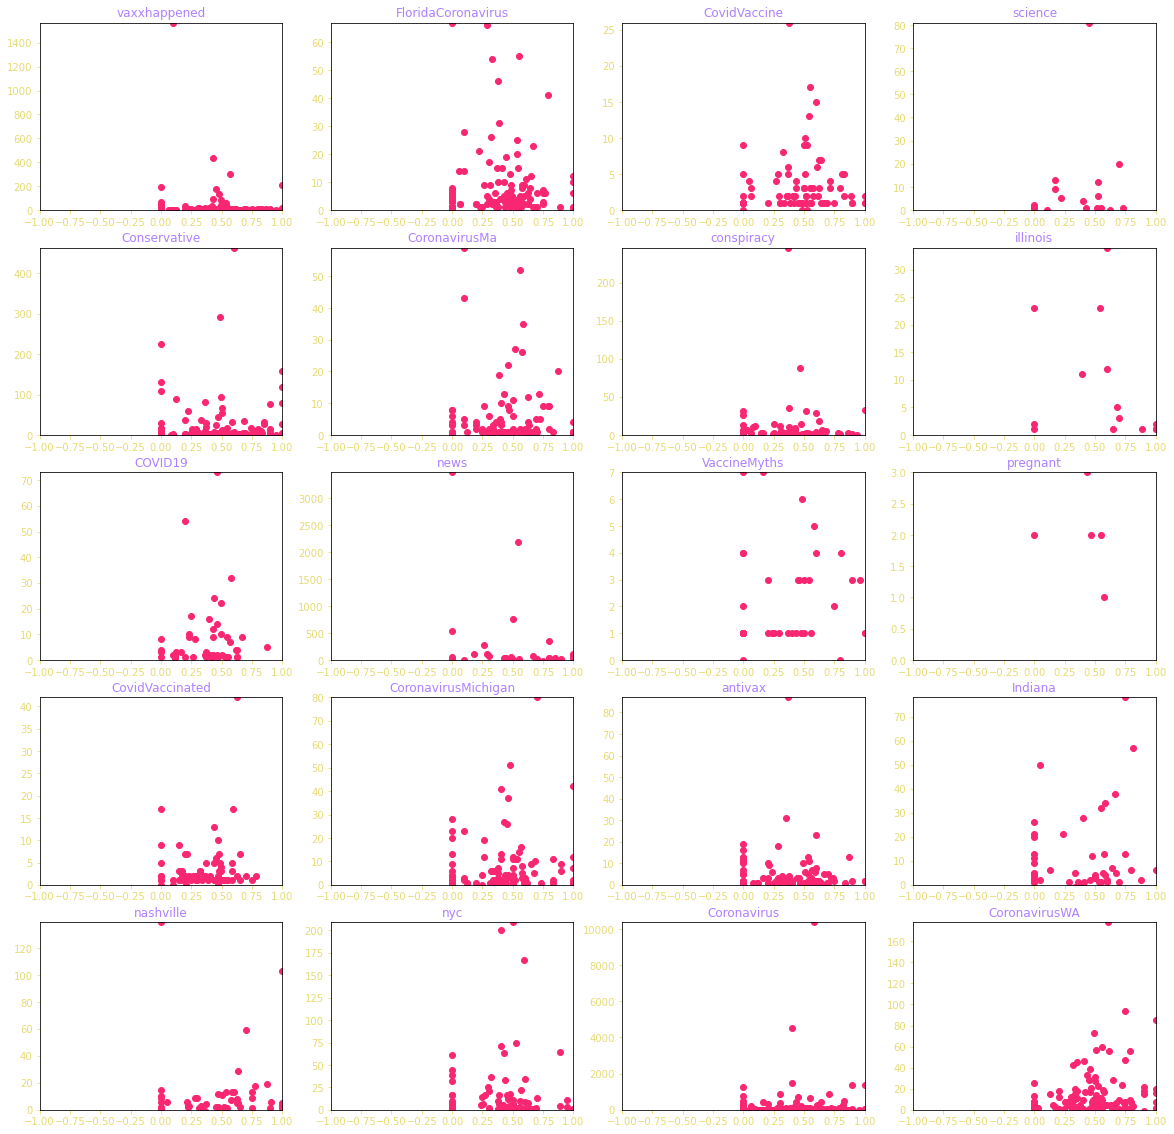

In [72]:
fig, axs = plt.subplots(5,4)
fig.set_size_inches(20,20)
for i in range(4):
    for j in range(5):
        x = reddit_comments_subreddit[reddit_comments_subreddit['subreddit']==subreddits[(i*5+j)]]['subjectivity']
        y = reddit_comments_subreddit[reddit_comments_subreddit['subreddit']==subreddits[(i*5+j)]]['ups']
        axs[j,i].set_ylim([0,y.max()])
        axs[j,i].set_xlim([-1,1])
        axs[j,i].set_title(subreddits[(i*5+j)], color = '#AE81FF')
        axs[j,i].tick_params(axis='x', colors='#E6DB74')
        axs[j,i].tick_params(axis='y', colors='#E6DB74')
        axs[j,i].plot(x, y, 'o', color = '#F92672')